In [1]:
# RNN 모델을 발전시킨... LSTM 모델
# 문장을 완성하는 인공지능

In [3]:
!unzip '/content/drive/MyDrive/Colab Notebooks/nyt_commants/nyt_comments.zip' -d '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data'

Archive:  /content/drive/MyDrive/Colab Notebooks/nyt_commants/nyt_comments.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesApril2017.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesApril2018.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesFeb2017.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesFeb2018.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesJan2017.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesJan2018.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesMarch2017.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesMarch2018.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesMay2017.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/nyt_commants/data/CommentsApril20

In [ ]:
# 문장.... 바로 다음에 올 단어... 이후의 단어.
# 모델을 반복호출. 단어를 출력
# LSTM 게이트를 이용해 이전 은닉상태를 현재의 입력에 반영

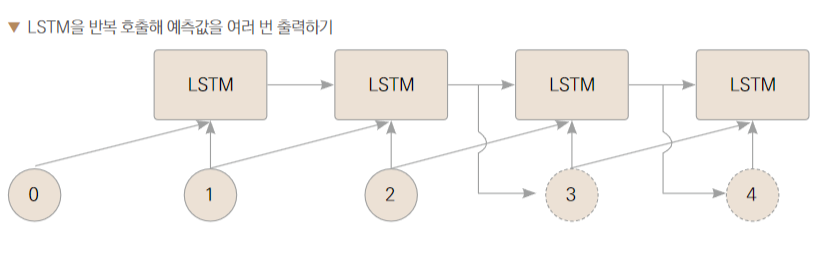

In [4]:
# 비가 ->오면
# 비가, 오면  -> 우산을

# 오면,우산을 ->쓰고
# 우산을,쓰고 -> 나간다

# 비가 오면 우산을 쓰고 나간다

In [5]:
import pandas as pd

In [ ]:
# 디렉터리의 데이터 수집
url = '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/*.csv'
import glob
csv_lists = glob.glob(url)
csv_lists[:]

In [ ]:
pd.read_csv(csv_lists[0])['headline'].values.tolist()

In [22]:
# 리스트에 잇는 파일명을 가지고 Articles문장이 잇는 파일명을읽어서 headline 데이터만 추출
all_headlines=[]
for filename in csv_lists:
  if 'Articles' in filename:
    all_headlines.append(pd.read_csv(filename)['headline'].values.tolist())    

In [ ]:
def clean_text(text):
  # 모든 단어를 소문자로 변경하고 특수문자를 제거
  return ''.join([i for i in text if i not in string.punctuation])

# 전처리 : 
all_headlines = [text for text in all_headlines if text != 'Unknown']
clean_lists = [clean_text(text) for text in all_headlines]

# 모든 단어를 분리해서 고유 번호를 지정
bow_dict = {}

for words in clean_lists:
  for word in words.split():
    if word not in bow_dict.keys():
      bow_dict[word] = len(bow_dict.keys())
bow_dict    

In [9]:
# BOW(bag of words)
# 단어를 구분하고 ..사전을 만든다음 고유번호를 부여
# 고유번호를 담고있는 사전을 BOW
# 자연어를 숫자로변경 -> 2개의 단어와 다음에 올 단어를 반환해주도록 데이터셋을 구현

In [11]:
from torch.utils.data.dataset import Dataset

In [15]:
import string
sample = 'dkeif\\dkeidkf!'
''.join([i for i in sample if i not in string.punctuation])

'dkeifdkeidkf'

In [ ]:
import glob
class TextGeneration(Dataset):
  def __init__(self):
    all_headlines = []
    url = '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/*.csv'
    csv_lists = glob.glob(url)
    for fn in csv_lists:
      if 'Articles' in fn:
        df = pd.read_csv(fn)
        all_headlines.append(df['headline'].values.tolist())
    


  def clean_text(self,text):
    # 모든 단어를 소문자로 변경하고 특수문자를 제거
    return ''.join([i for i in text if i not in string.punctuation])